In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
df = pd.read_csv("vgsales.csv")

df = df.loc[df['Year'] < 2008]
df.head(3)
pd.set_option('display.max_columns', None)


In [266]:
'''
SELECT Year, SUM Global_Sales
FROM df
GROUP BY Year
'''

#df = df.dropna(subset=['Year', 'Publisher'])
plt.figure(figsize=(12,6))
#df.groupby(['Year'])['Global_Sales'].sum().plot()
df.groupby(['Year'])['Global_Sales'].sum()


Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
Name: Global_Sales, dtype: float64

<Figure size 864x432 with 0 Axes>

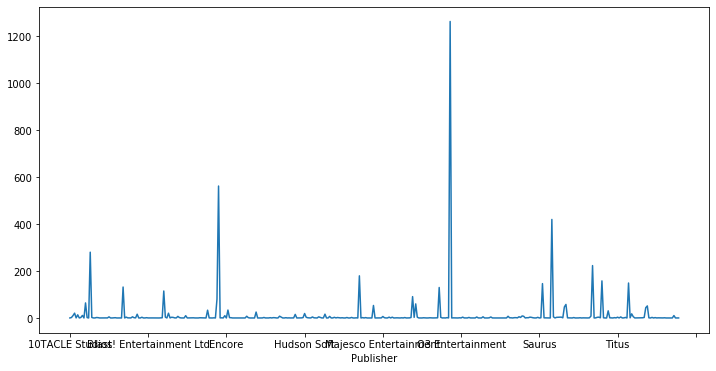

In [174]:
'''
SELECT SUM Global_Sales
FROM df
GROUP BY Publisher
'''
plt.figure(figsize=(12,6))

# Grouped by Publisher and selected the sum of Global_Sales (a Series object)
df.groupby(['Publisher'])['Global_Sales'].sum() 

# Now we should be able to plot it??
df.groupby(['Publisher'])['Global_Sales'].sum().plot()

<Figure size 576x288 with 0 Axes>

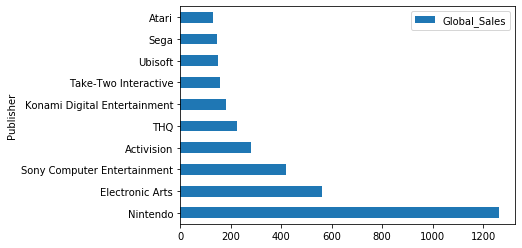

In [201]:
'''
SELECT Publisher, SUM Global_Sales
FROM df
GROUP BY Year
'''


plt.figure(figsize=(8,4))
df.groupby(['Publisher'])['Genre']  # SeriesGroupBy
df.groupby(['Publisher'])['Global_Sales'].sum() # Series
#df.groupby(['Publisher'])['Global_Sales'].sum().plot()
#df.groupby(['Publisher'])['Global_Sales'].sum().plot(kind='barh')

#df.groupby(['Publisher'])['Global_Sales'].sum().head(10).plot(kind='barh')      # auto sort by publisher.  Not what i want

#df.groupby(['Publisher'])['Global_Sales'].sum().reset_index()    #.sort_values(['Global_Sales'], ascending=False).head(10).plot(kind='barh', y='Global_Sales', x='Publisher')


df_flat = df.groupby(['Publisher'])['Global_Sales'].sum().reset_index()
df_flat.sort_values(['Global_Sales'], ascending=False).head(10).plot(kind='barh', y='Global_Sales', x='Publisher')
 

In [241]:
'''
SELECT Year, SUM Global_Sales
FROM df_me
GROUP BY Year, Platform
'''

# plot global sales by platform by year.  Sounds tricky, but we can handle it.

platforms = ['NES', 'PS', '2600', 'PS2', 'GBA', 'GB']
df_me = df.loc[df['Platform'].isin(platforms)]
#  We can group by Platform and Year and it will return the df and plot shown below.
#  This isn't what we were looking for
df_me = df_me.groupby(['Platform', 'Year'])['Global_Sales'].sum()
df_me.head(5)



Platform  Year  
2600      1980.0    11.38
          1981.0    35.77
          1982.0    28.86
          1983.0     5.83
          1984.0     0.27
Name: Global_Sales, dtype: float64

['Wii' 'NES' 'GB' 'DS' 'PS2' 'SNES' 'GBA' 'X360' 'N64' 'PS' 'XB' '2600'
 'PSP' 'GC' 'PS3' 'PC' 'GEN' 'DC' 'SAT' 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG'
 'PCFX']


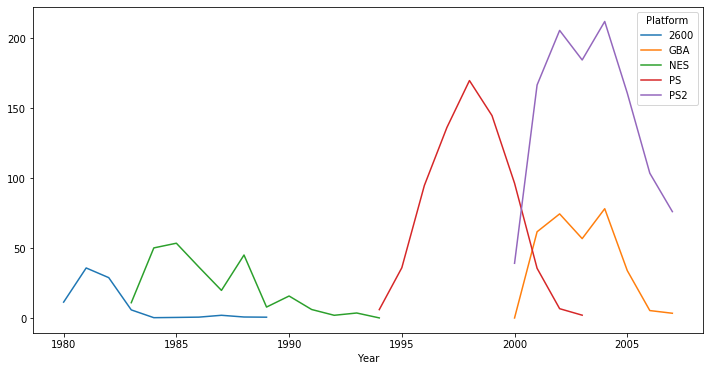

In [265]:
# plot global sales by platform by year  AHHHHH!
df.columns

print(df.Platform.unique())
platforms = ['NES', 'PS', '2600', 'PS2', 'GBA']

df_top = df.loc[df['Platform'].isin(platforms)]
df_top.head()

#plt.figure(figsize=(12,6))

df_top.groupby(['Year', 'Platform'])['Global_Sales'].sum()  #.plot()  # Doesn't look right, where are my other plots?

#plt.figure(figsize=(12,6))
df_top.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack().plot(figsize=(12,6))  # Doesn't look right, where are my other plots?

